D209 - Data Mining - Task 2 By Krista Moik

In [1]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest, f_regression, f_classif
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
#Load medical_clean CSV
df_209=pd.read_csv('C:/Users/Kmoik WGU/Desktop/D209/medical_clean.csv')

In [3]:
#view head
df_209.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [5]:
#View data set
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

Cleaning the data

In [6]:
#check for duplicates
print(df_209.duplicated().value_counts())

False    10000
Name: count, dtype: int64


In [7]:
#check for null values - even though view of data indicates no nulls
df_209.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

No duplicate and no null values located in the data set. 

<Axes: xlabel='Children'>

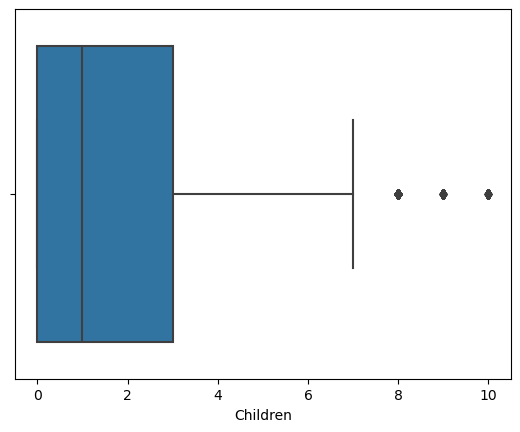

In [8]:
#visualizing numeric data
sns.boxplot(df_209, x='Children')

<Axes: xlabel='Age'>

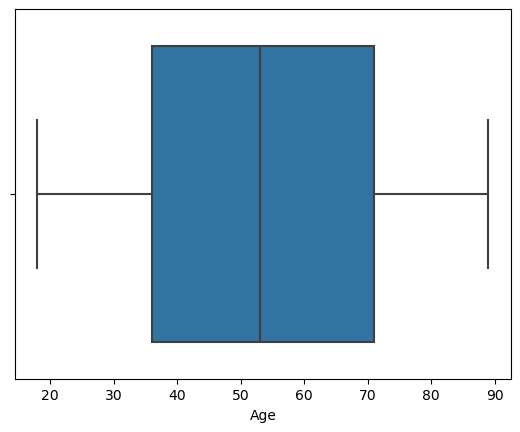

In [9]:
sns.boxplot(df_209, x='Age')

In [10]:
df_209.Children.describe()

count    10000.000000
mean         2.097200
std          2.163659
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         10.000000
Name: Children, dtype: float64

<Axes: xlabel='Income'>

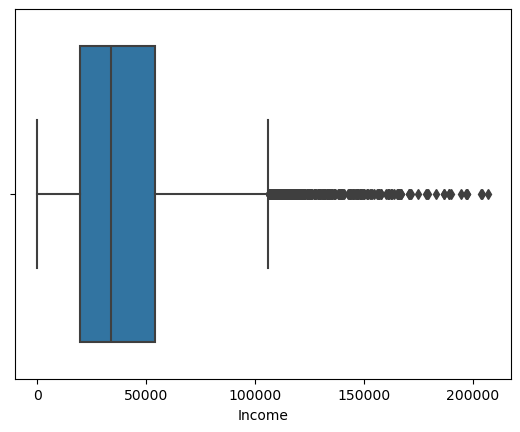

In [11]:
sns.boxplot(df_209, x='Income')

In [12]:
df_209.Income.describe()

count     10000.000000
mean      40490.495160
std       28521.153293
min         154.080000
25%       19598.775000
50%       33768.420000
75%       54296.402500
max      207249.100000
Name: Income, dtype: float64

<Axes: xlabel='VitD_levels'>

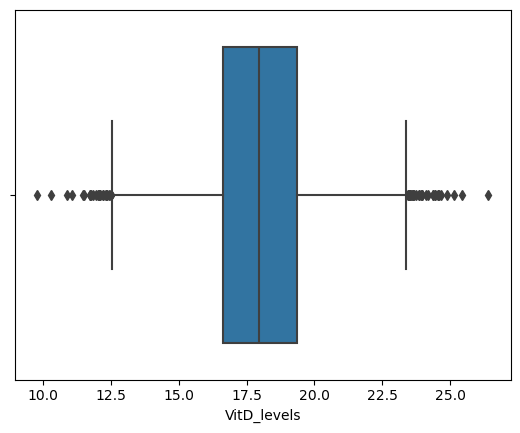

In [13]:
sns.boxplot(df_209, x='VitD_levels')

In [14]:
df_209.VitD_levels.describe()

count    10000.000000
mean        17.964262
std          2.017231
min          9.806483
25%         16.626439
50%         17.951122
75%         19.347963
max         26.394449
Name: VitD_levels, dtype: float64

<Axes: xlabel='Doc_visits'>

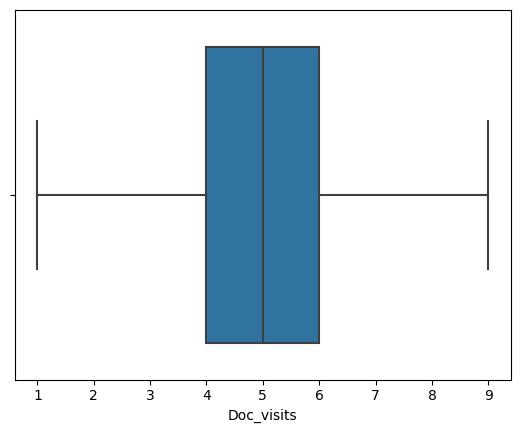

In [15]:
sns.boxplot(df_209, x='Doc_visits')

<Axes: xlabel='Full_meals_eaten'>

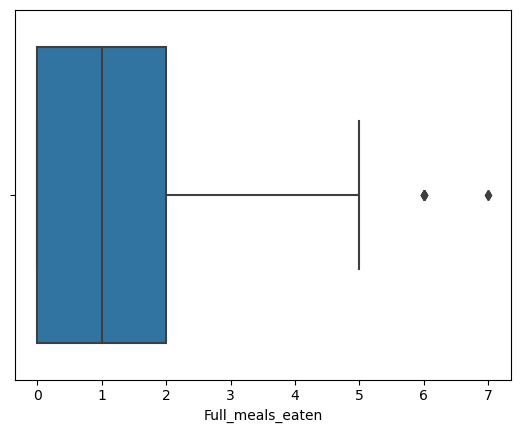

In [16]:
sns.boxplot(df_209, x='Full_meals_eaten')

In [17]:
df_209.Full_meals_eaten.describe()

count    10000.000000
mean         1.001400
std          1.008117
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: Full_meals_eaten, dtype: float64

<Axes: xlabel='vitD_supp'>

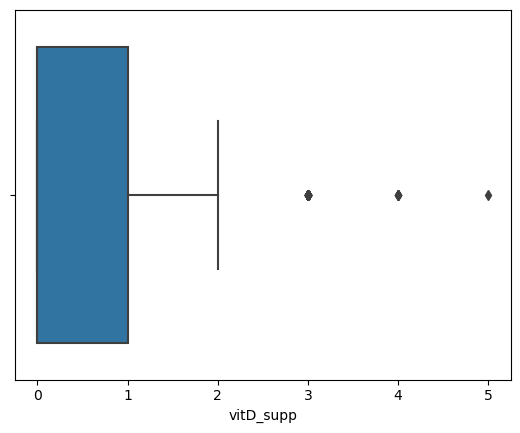

In [18]:
sns.boxplot(df_209, x='vitD_supp')

In [19]:
df_209.vitD_supp.describe()

count    10000.000000
mean         0.398900
std          0.628505
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: vitD_supp, dtype: float64

<Axes: xlabel='Initial_days'>

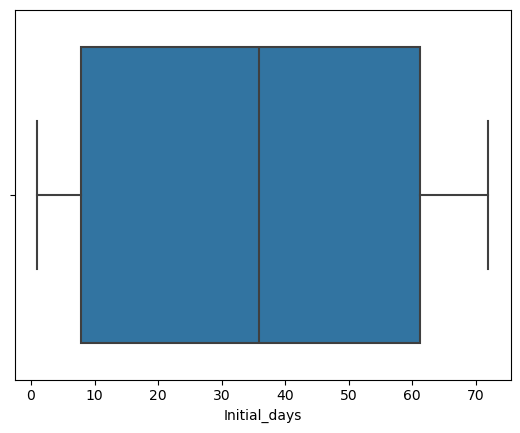

In [20]:
sns.boxplot(df_209, x='Initial_days')

<Axes: xlabel='TotalCharge'>

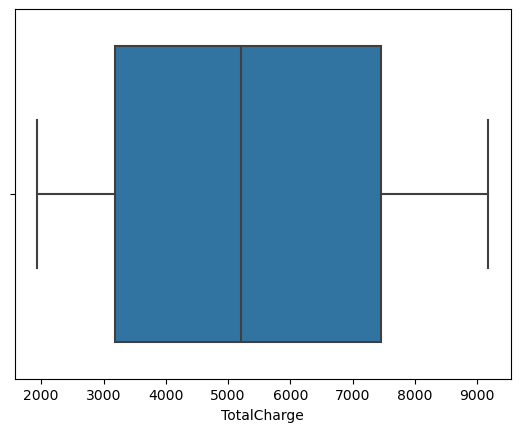

In [21]:
sns.boxplot(df_209, x='TotalCharge')

<Axes: xlabel='Additional_charges'>

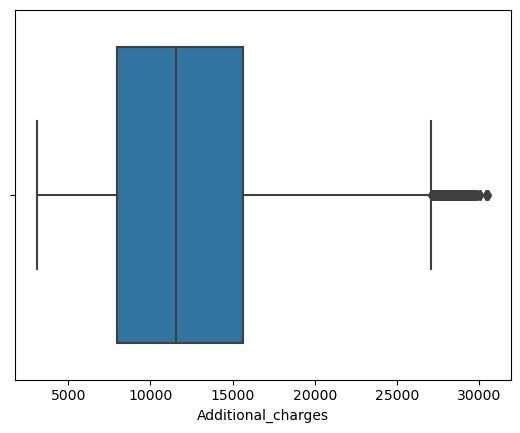

In [22]:
sns.boxplot(df_209, x='Additional_charges')

In [23]:
df_209.Additional_charges.describe()

count    10000.000000
mean     12934.528587
std       6542.601544
min       3125.703000
25%       7986.487755
50%      11573.977735
75%      15626.490000
max      30566.070000
Name: Additional_charges, dtype: float64

Once again, I am opting to retain outliers as they appear to be reasonable and justified and will maintain the diversity and integrity of the dataset

In [24]:
#drop columsn that will not be used
df_209.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Lat', 'Lng', 'Population', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5', 'Item6', 'Item7', 'Item8', 'Job'], axis=1, inplace=True)

In [25]:
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Area                10000 non-null  object 
 1   Children            10000 non-null  int64  
 2   Age                 10000 non-null  int64  
 3   Income              10000 non-null  float64
 4   Marital             10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   ReAdmis             10000 non-null  object 
 7   VitD_levels         10000 non-null  float64
 8   Doc_visits          10000 non-null  int64  
 9   Full_meals_eaten    10000 non-null  int64  
 10  vitD_supp           10000 non-null  int64  
 11  Soft_drink          10000 non-null  object 
 12  Initial_admin       10000 non-null  object 
 13  HighBlood           10000 non-null  object 
 14  Stroke              10000 non-null  object 
 15  Complication_risk   10000 non-null  object 
 16  Overw

I will now re-express my Yes/No variables to 1/0

In [26]:
#re-expressing ReAdmis
df_209['ReAdmis_numeric']=df_209['ReAdmis']

In [27]:
#set up dictionary
dict_readmis={'ReAdmis_numeric' : {'No':0, 'Yes':1}}

In [28]:
#replace variable's values
df_209.replace(dict_readmis, inplace=True)

In [29]:
#re-expressing Soft_drink
df_209['Soft_drink_numeric']=df_209['Soft_drink']

In [30]:
#set up dictionary
dict_soft={'Soft_drink_numeric' : {'No':0, 'Yes':1}}

In [31]:
#replace variable's values
df_209.replace(dict_soft, inplace=True)

In [32]:
#re-expressing HighBlood
df_209['HighBlood_numeric']=df_209['HighBlood']

In [33]:
#set up dictionary
dict_blood={'HighBlood_numeric' : {'No':0, 'Yes':1}}

In [34]:
#replace variable's values
df_209.replace(dict_blood, inplace=True)

In [35]:
#re-expressing Stroke
df_209['Stroke_numeric']=df_209['Stroke']

In [36]:
#set up dictionary
dict_stroke={'Stroke_numeric' : {'No':0, 'Yes':1}}

In [37]:
#replace variable's values
df_209.replace(dict_stroke, inplace=True)

In [38]:
#re-expressing Overweight
df_209['Overweight_numeric']=df_209['Overweight']

In [39]:
#set up dictionary
dict_weight={'Overweight_numeric' : {'No':0, 'Yes':1}}

In [40]:
#replace variable's values
df_209.replace(dict_weight, inplace=True)

In [41]:
#re-expressing Arthritis
df_209['Arthritis_numeric']=df_209['Arthritis']

In [42]:
#set up dictionary
dict_arthritis={'Arthritis_numeric' : {'No':0, 'Yes':1}}

In [43]:
#replace variable's values
df_209.replace(dict_arthritis, inplace=True)

In [44]:
#re-expressing Diabetes
df_209['Diabetes_numeric']=df_209['Diabetes']

In [45]:
#set up dictionary
dict_diab={'Diabetes_numeric' : {'No':0, 'Yes':1}}

In [46]:
#replace variable's values
df_209.replace(dict_diab, inplace=True)

In [47]:
#re-expressing Hyperlipidemia
df_209['Hyperlipidemia_numeric']=df_209['Hyperlipidemia']

In [48]:
#set up dictionary
dict_lip={'Hyperlipidemia_numeric' : {'No':0, 'Yes':1}}

In [49]:
#replace variable's values
df_209.replace(dict_lip, inplace=True)

In [50]:
#re-expressing BackPain
df_209['BackPain_numeric']=df_209['BackPain']

In [51]:
#set up dictionary
dict_back={'BackPain_numeric' : {'No':0, 'Yes':1}}

In [52]:
#replace variable's values
df_209.replace(dict_back, inplace=True)

In [53]:
#re-expressing Anxiety
df_209['Anxiety_numeric']=df_209['Anxiety']

In [54]:
#set up dictionary
dict_anx={'Anxiety_numeric' : {'No':0, 'Yes':1}}

In [55]:
#replace variable's values
df_209.replace(dict_anx, inplace=True)

In [56]:
#re-expressing Allergic_rhinitis
df_209['Allergic_rhinitis_numeric']=df_209['Allergic_rhinitis']

In [57]:
#set up dictionary
dict_alle={'Allergic_rhinitis_numeric' : {'No':0, 'Yes':1}}

In [58]:
#replace variable's values
df_209.replace(dict_alle, inplace=True)

In [59]:
#re-expressing Reflux_esophagitis
df_209['Reflux_esophagitis_numeric']=df_209['Reflux_esophagitis']

In [60]:
#set up dictionary
dict_refl={'Reflux_esophagitis_numeric' : {'No':0, 'Yes':1}}

In [61]:
#replace variable's values
df_209.replace(dict_refl, inplace=True)

In [62]:
#re-expressing Asthma
df_209['Asthma_numeric']=df_209['Asthma']

In [63]:
#set up dictionary
dict_asth={'Asthma_numeric' : {'No':0, 'Yes':1}}

In [64]:
#replace variable's values
df_209.replace(dict_asth, inplace=True)

In [65]:
#drop original columns
df_209.drop(['Asthma', 'Reflux_esophagitis', 'Allergic_rhinitis', 'ReAdmis', 'Soft_drink', 'HighBlood', 'Stroke', 'Overweight', 'Arthritis', 'Diabetes', 'BackPain', 'Anxiety', 'Hyperlipidemia'], axis=1, inplace=True)

In [66]:
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Area                        10000 non-null  object 
 1   Children                    10000 non-null  int64  
 2   Age                         10000 non-null  int64  
 3   Income                      10000 non-null  float64
 4   Marital                     10000 non-null  object 
 5   Gender                      10000 non-null  object 
 6   VitD_levels                 10000 non-null  float64
 7   Doc_visits                  10000 non-null  int64  
 8   Full_meals_eaten            10000 non-null  int64  
 9   vitD_supp                   10000 non-null  int64  
 10  Initial_admin               10000 non-null  object 
 11  Complication_risk           10000 non-null  object 
 12  Services                    10000 non-null  object 
 13  Initial_days                1000

In [67]:
#re-express variables with more than 2 response types
onehot_encoder = OneHotEncoder(sparse=False)

In [68]:
onehot_encoded=onehot_encoder.fit_transform(df_209[['Gender', 'Marital', 'Complication_risk', 'Initial_admin', 'Area', 'Services']])

C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [69]:
df_209encoded=pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(['Gender', 'Marital', 'Complication_risk', 'Initial_admin', 'Area', 'Services']))

In [70]:
df_209encoded=df_209encoded.astype('int64')

In [71]:
#merging encoded columns to df
df_209=pd.concat([df_209, df_209encoded], axis=1)

In [72]:
#drop original columns
df_209.drop(['Gender', 'Marital', 'Complication_risk', 'Initial_admin', 'Area', 'Services'], axis=1, inplace=True)

In [73]:
df_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 44 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Children                             10000 non-null  int64  
 1   Age                                  10000 non-null  int64  
 2   Income                               10000 non-null  float64
 3   VitD_levels                          10000 non-null  float64
 4   Doc_visits                           10000 non-null  int64  
 5   Full_meals_eaten                     10000 non-null  int64  
 6   vitD_supp                            10000 non-null  int64  
 7   Initial_days                         10000 non-null  float64
 8   TotalCharge                          10000 non-null  float64
 9   Additional_charges                   10000 non-null  float64
 10  ReAdmis_numeric                      10000 non-null  int64  
 11  Soft_drink_numeric           

<Axes: >

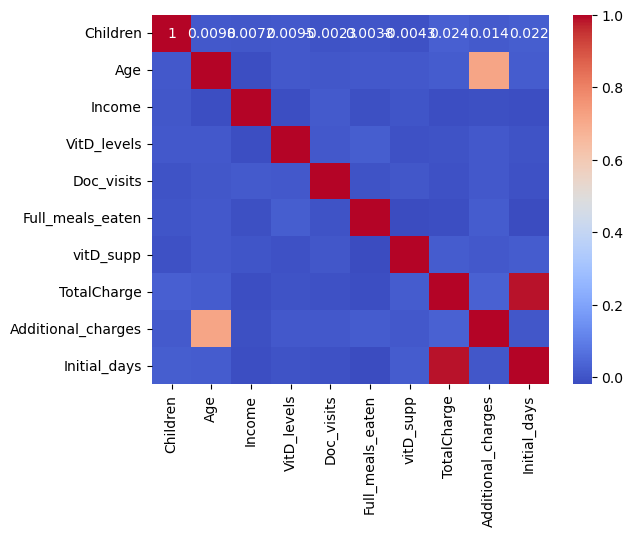

In [74]:
#heat map with quantitative data
sns.heatmap(data=df_209[['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp', 'TotalCharge', 'Additional_charges', 'Initial_days']].corr(), annot=True, cmap='coolwarm')

<Axes: >

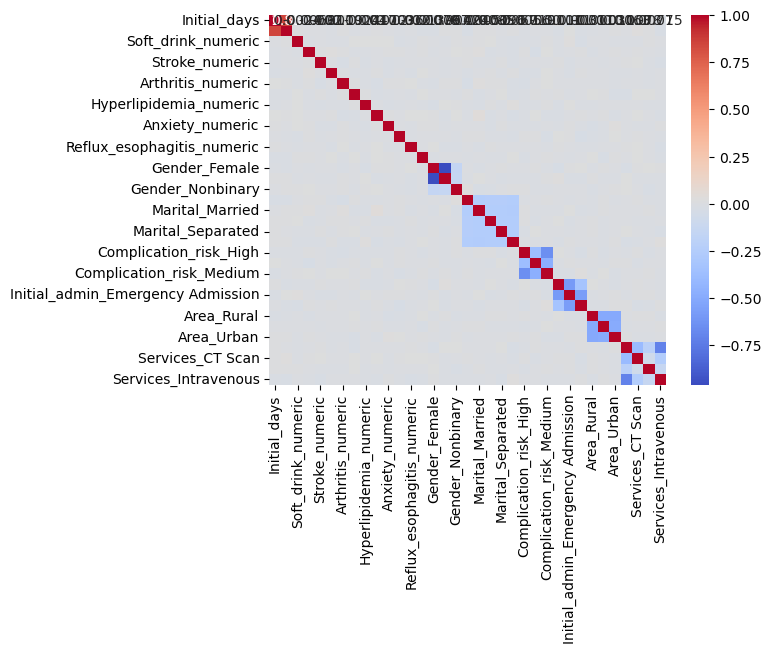

In [75]:
#heat map with qualitative variables
sns.heatmap(data=df_209[['Initial_days', 'ReAdmis_numeric', 'Soft_drink_numeric', 'HighBlood_numeric', 'Stroke_numeric', 'Overweight_numeric', 'Arthritis_numeric', 'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric', 'Anxiety_numeric', 'Allergic_rhinitis_numeric', 'Reflux_esophagitis_numeric', 'Asthma_numeric', 'Gender_Female', 'Gender_Male', 'Gender_Nonbinary', 'Marital_Divorced', 'Marital_Married', 'Marital_Never Married', 'Marital_Separated', 'Marital_Widowed', 'Complication_risk_High', 'Complication_risk_Low', 'Complication_risk_Medium', 'Initial_admin_Elective Admission', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission', 'Area_Rural', 'Area_Suburban', 'Area_Urban', 'Services_Blood Work', 'Services_CT Scan', 'Services_MRI', 'Services_Intravenous']].corr(), annot=True, cmap='coolwarm')

Next I will find the best variables for the model using SelectKBest and p-values

In [76]:
# Assign values to X for all predictor features
X = df_209.drop('Initial_days', axis=1)
# Assign values to y for the dependent variable
y = df_209['Initial_days']

In [77]:
#print features - confirm all other columns present
feature_names = X.columns
print(feature_names)

Index(['Children', 'Age', 'Income', 'VitD_levels', 'Doc_visits',
       'Full_meals_eaten', 'vitD_supp', 'TotalCharge', 'Additional_charges',
       'ReAdmis_numeric', 'Soft_drink_numeric', 'HighBlood_numeric',
       'Stroke_numeric', 'Overweight_numeric', 'Arthritis_numeric',
       'Diabetes_numeric', 'Hyperlipidemia_numeric', 'BackPain_numeric',
       'Anxiety_numeric', 'Allergic_rhinitis_numeric',
       'Reflux_esophagitis_numeric', 'Asthma_numeric', 'Gender_Female',
       'Gender_Male', 'Gender_Nonbinary', 'Marital_Divorced',
       'Marital_Married', 'Marital_Never Married', 'Marital_Separated',
       'Marital_Widowed', 'Complication_risk_High', 'Complication_risk_Low',
       'Complication_risk_Medium', 'Initial_admin_Elective Admission',
       'Initial_admin_Emergency Admission',
       'Initial_admin_Observation Admission', 'Area_Rural', 'Area_Suburban',
       'Area_Urban', 'Services_Blood Work', 'Services_CT Scan',
       'Services_Intravenous', 'Services_MRI'],
      

In [78]:
#k=features 
k_best = SelectKBest(score_func = f_classif, k='all')

In [79]:
X_new = k_best.fit_transform(X, y)

C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw


In [80]:
selected_features_indices=k_best.get_support(indices=True)

In [81]:
selected_features_names=X.columns[selected_features_indices]

In [82]:
#find p values 
p_values = pd.DataFrame({'Feature': X.columns, 'p_value':k_best.pvalues_}).sort_values('p_value')
features_to_keep = p_values['Feature'][p_values['p_value'] < .05]

In [83]:
print(p_values)

                                Feature   p_value
42                         Services_MRI  0.000000
40                     Services_CT Scan  0.000000
35  Initial_admin_Observation Admission  0.000000
34    Initial_admin_Emergency Admission  0.000000
33     Initial_admin_Elective Admission  0.000000
29                      Marital_Widowed  0.000000
25                     Marital_Divorced  0.000000
24                     Gender_Nonbinary  0.000000
9                       ReAdmis_numeric  0.000000
10                   Soft_drink_numeric  0.000000
23                          Gender_Male  0.000000
12                       Stroke_numeric  0.000000
22                        Gender_Female  0.000000
18                      Anxiety_numeric  0.000000
15                     Diabetes_numeric  0.000000
7                           TotalCharge  0.000895
0                              Children  0.215158
4                            Doc_visits  0.287752
8                    Additional_charges  0.348687


obtained 16 most significant variables with p values less than 0.05: Services_MRI, Services_CT Scan, Initial_admin_Observation Admission, Initial_admin_Emergency Admission, Initial_admin_Elective Admission, Marital_Widowed, Marital_Divorced, Gender_Nonbinary, ReAdmis_numierc, Soft_drink_numeric, Gender_Male, Stroke_numeric, Gender_Female, Anxiety_numeric, Diabetes_numeric, TotalCharge. 

In [84]:
#check for multicollinearity using VIF
#set independent variable for VIF
X=df_209[['TotalCharge', 'Marital_Divorced', 'Initial_admin_Emergency Admission', 'Services_CT Scan', 'Services_MRI', 'Initial_admin_Elective Admission', 'Marital_Widowed', 'Gender_Nonbinary', 'ReAdmis_numeric', 'Soft_drink_numeric', 'Gender_Male', 'Stroke_numeric', 'Gender_Female', 'Anxiety_numeric', 'Diabetes_numeric', 'Initial_admin_Observation Admission']]

In [85]:
#VIF dataframe
vif_df_209=pd.DataFrame()
vif_df_209["feature"]=X.columns

In [86]:
#calculate VIF for all independent variables
vif_df_209["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

C:\Users\Kmoik WGU\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [87]:
print(vif_df_209)

                                feature       VIF
0                           TotalCharge  3.588237
1                      Marital_Divorced  1.068627
2     Initial_admin_Emergency Admission       inf
3                      Services_CT Scan  1.007837
4                          Services_MRI  1.007156
5      Initial_admin_Elective Admission       inf
6                       Marital_Widowed  1.068000
7                      Gender_Nonbinary       inf
8                       ReAdmis_numeric  3.546527
9                    Soft_drink_numeric  1.001768
10                          Gender_Male       inf
11                       Stroke_numeric  1.000806
12                        Gender_Female       inf
13                      Anxiety_numeric  1.003595
14                     Diabetes_numeric  1.001992
15  Initial_admin_Observation Admission       inf


In [88]:
#will remove the first variable with INF multicollinearity - Initial_admin_Emergency Admission
#set independent variable for VIF
X=df_209[['TotalCharge', 'Marital_Divorced', 'Services_CT Scan', 'Services_MRI', 'Initial_admin_Elective Admission', 'Marital_Widowed', 'Gender_Nonbinary', 'ReAdmis_numeric', 'Soft_drink_numeric', 'Gender_Male', 'Stroke_numeric', 'Gender_Female', 'Anxiety_numeric', 'Diabetes_numeric', 'Initial_admin_Observation Admission']]

In [89]:
#VIF dataframe
vif_df_209=pd.DataFrame()
vif_df_209["feature"]=X.columns

In [90]:
#calculate VIF for all independent variables
vif_df_209["VIF"]=[variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

In [91]:
print(vif_df_209)

                                feature       VIF
0                           TotalCharge  3.588237
1                      Marital_Divorced  1.068627
2                      Services_CT Scan  1.007837
3                          Services_MRI  1.007156
4      Initial_admin_Elective Admission  1.142038
5                       Marital_Widowed  1.068000
6                      Gender_Nonbinary  1.363318
7                       ReAdmis_numeric  3.546527
8                    Soft_drink_numeric  1.001768
9                           Gender_Male  8.818122
10                       Stroke_numeric  1.000806
11                        Gender_Female  9.266724
12                      Anxiety_numeric  1.003595
13                     Diabetes_numeric  1.001992
14  Initial_admin_Observation Admission  1.146025


Remaining VIF are all under 10.  

In [92]:
#renaming statistically significant columns without spaces
df_209.rename(columns={'Services_CT Scan' : 'Services_CTscan', 'Initial_admin_Elective Admission' : 'Initial_admin_Elective', 'Initial_admin_Observation Admission' : 'Initial_admin_Observe'}, inplace=True)

In [93]:
#save cleaned data set
clean_df_209=df_209.copy(deep=True)

In [94]:
clean_df_209.to_csv('C:/Users/Kmoik WGU/Desktop/KMoikD209_medical.csv')

In [95]:
#create dataset with only statistically significant variables
columns_to_keep=['Services_MRI', 'Services_CTscan', 'Initial_admin_Observe', 'Initial_admin_Elective', 'Marital_Widowed', 'Marital_Divorced', 'Gender_Nonbinary', 'ReAdmis_numeric', 'Soft_drink_numeric', 'Gender_Male', 'Gender_Female', 'Stroke_numeric', 'Anxiety_numeric', 'Diabetes_numeric', 'TotalCharge', 'Initial_days']
reduced_209=df_209[columns_to_keep]

In [96]:
reduced_209.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Services_MRI            10000 non-null  int64  
 1   Services_CTscan         10000 non-null  int64  
 2   Initial_admin_Observe   10000 non-null  int64  
 3   Initial_admin_Elective  10000 non-null  int64  
 4   Marital_Widowed         10000 non-null  int64  
 5   Marital_Divorced        10000 non-null  int64  
 6   Gender_Nonbinary        10000 non-null  int64  
 7   ReAdmis_numeric         10000 non-null  int64  
 8   Soft_drink_numeric      10000 non-null  int64  
 9   Gender_Male             10000 non-null  int64  
 10  Gender_Female           10000 non-null  int64  
 11  Stroke_numeric          10000 non-null  int64  
 12  Anxiety_numeric         10000 non-null  int64  
 13  Diabetes_numeric        10000 non-null  int64  
 14  TotalCharge             10000 non-null 

In [97]:
#update X and y with reduced data set
X = reduced_209.drop('Initial_days', axis=1)
# Assign values to y for the dependent variable
y = reduced_209['Initial_days']

In [98]:
#Split the data set with an 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 25)

In [99]:
#Save the training and testing sets as csv files
pd.DataFrame(X_train).to_csv('C:/Users/Kmoik WGU/Desktop/X_train.csv')
pd.DataFrame(X_test).to_csv('C:/Users/Kmoik WGU/Desktop/X_test.csv')
pd.DataFrame(y_train).to_csv('C:/Users/Kmoik WGU/Desktop/y_train.csv')
pd.DataFrame(y_test).to_csv('C:/Users/Kmoik WGU/Desktop/y_test.csv')

In [100]:
#Instantiate Random Forest Regressor
rfr=RandomForestRegressor(random_state=15)

In [101]:
#fit regressor
rfr.fit(X,y)

RandomForestRegressor(random_state=15)

In [102]:
rfr

RandomForestRegressor(random_state=15)

In [103]:
#Hyperparameter Tuning for RFR
#obtain optimal values for parameters
param_grid = {'n_estimators': [10, 50, 100],
              'max_depth': [8, None],
              'max_features': [2,3,4]}

In [104]:
#perform grid search with 5 fold cross validation
rfr_cv=GridSearchCV(rfr, param_grid, cv=5)

In [105]:
#fit the model
rfr_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=15),
             param_grid={'max_depth': [8, None], 'max_features': [2, 3, 4],
                         'n_estimators': [10, 50, 100]})

In [106]:
#check best Parameters used
print('Best Parameters: ',rfr_cv.best_params_)

Best Parameters:  {'max_depth': None, 'max_features': 4, 'n_estimators': 100}


In [107]:
#Check best score for top performing model
print('Training Score (MSE): ',rfr_cv.best_score_)
print('Training Score (RMSE): ',(rfr_cv.best_score_)**(1/2))
y_train_pred=rfr_cv.predict(X_train)
print('Training - R-squared Score for Model: ', r2_score(y_train, y_train_pred))

Training Score (MSE):  0.9888686990909278
Training Score (RMSE):  0.994418774506459
Training - R-squared Score for Model:  0.9984536848655955


In [108]:
#Check Prediction accuracy
y_pred=rfr_cv.predict(X_test)
print('Testing - Mean Squared Error for Model: ', MSE(y_test, y_pred))
print('Testing - Root Mean Squared Error for Model: ', MSE(y_test, y_pred)**(1/2))
print('Testing - R Squared Score for Model: ',r2_score(y_test, y_pred))

Testing - Mean Squared Error for Model:  7.588416353876204
Testing - Root Mean Squared Error for Model:  2.7547080342345183
Testing - R Squared Score for Model:  0.9890115558335932


In [109]:
#Accuracy score 
print('The Accuracy Score of the Random Forest Regressor:')
print(rfr_cv.score(X_test, y_test))

The Accuracy Score of the Random Forest Regressor:
0.9890115558335932


In [110]:
#create pd.Series of features importances
importances=pd.Series(data=rfr_cv.best_estimator_.feature_importances_, index=X_train.columns)

In [111]:
#sort importances
importances_sorted=importances.sort_values()

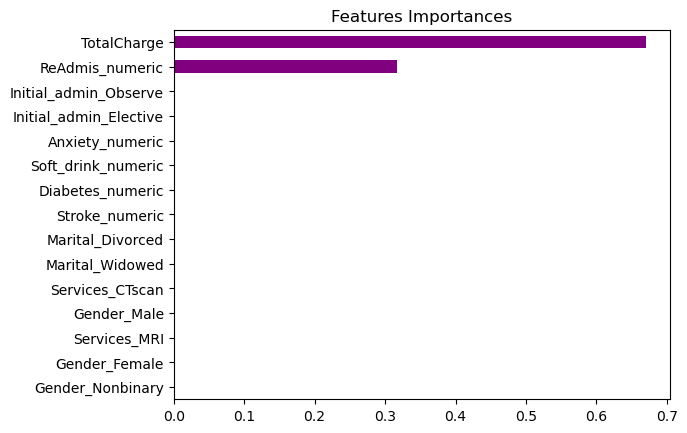

In [112]:
#draw barplot of importances_sorted
importances_sorted.plot(kind='barh', color='purple')
plt.title('Features Importances')
plt.show()

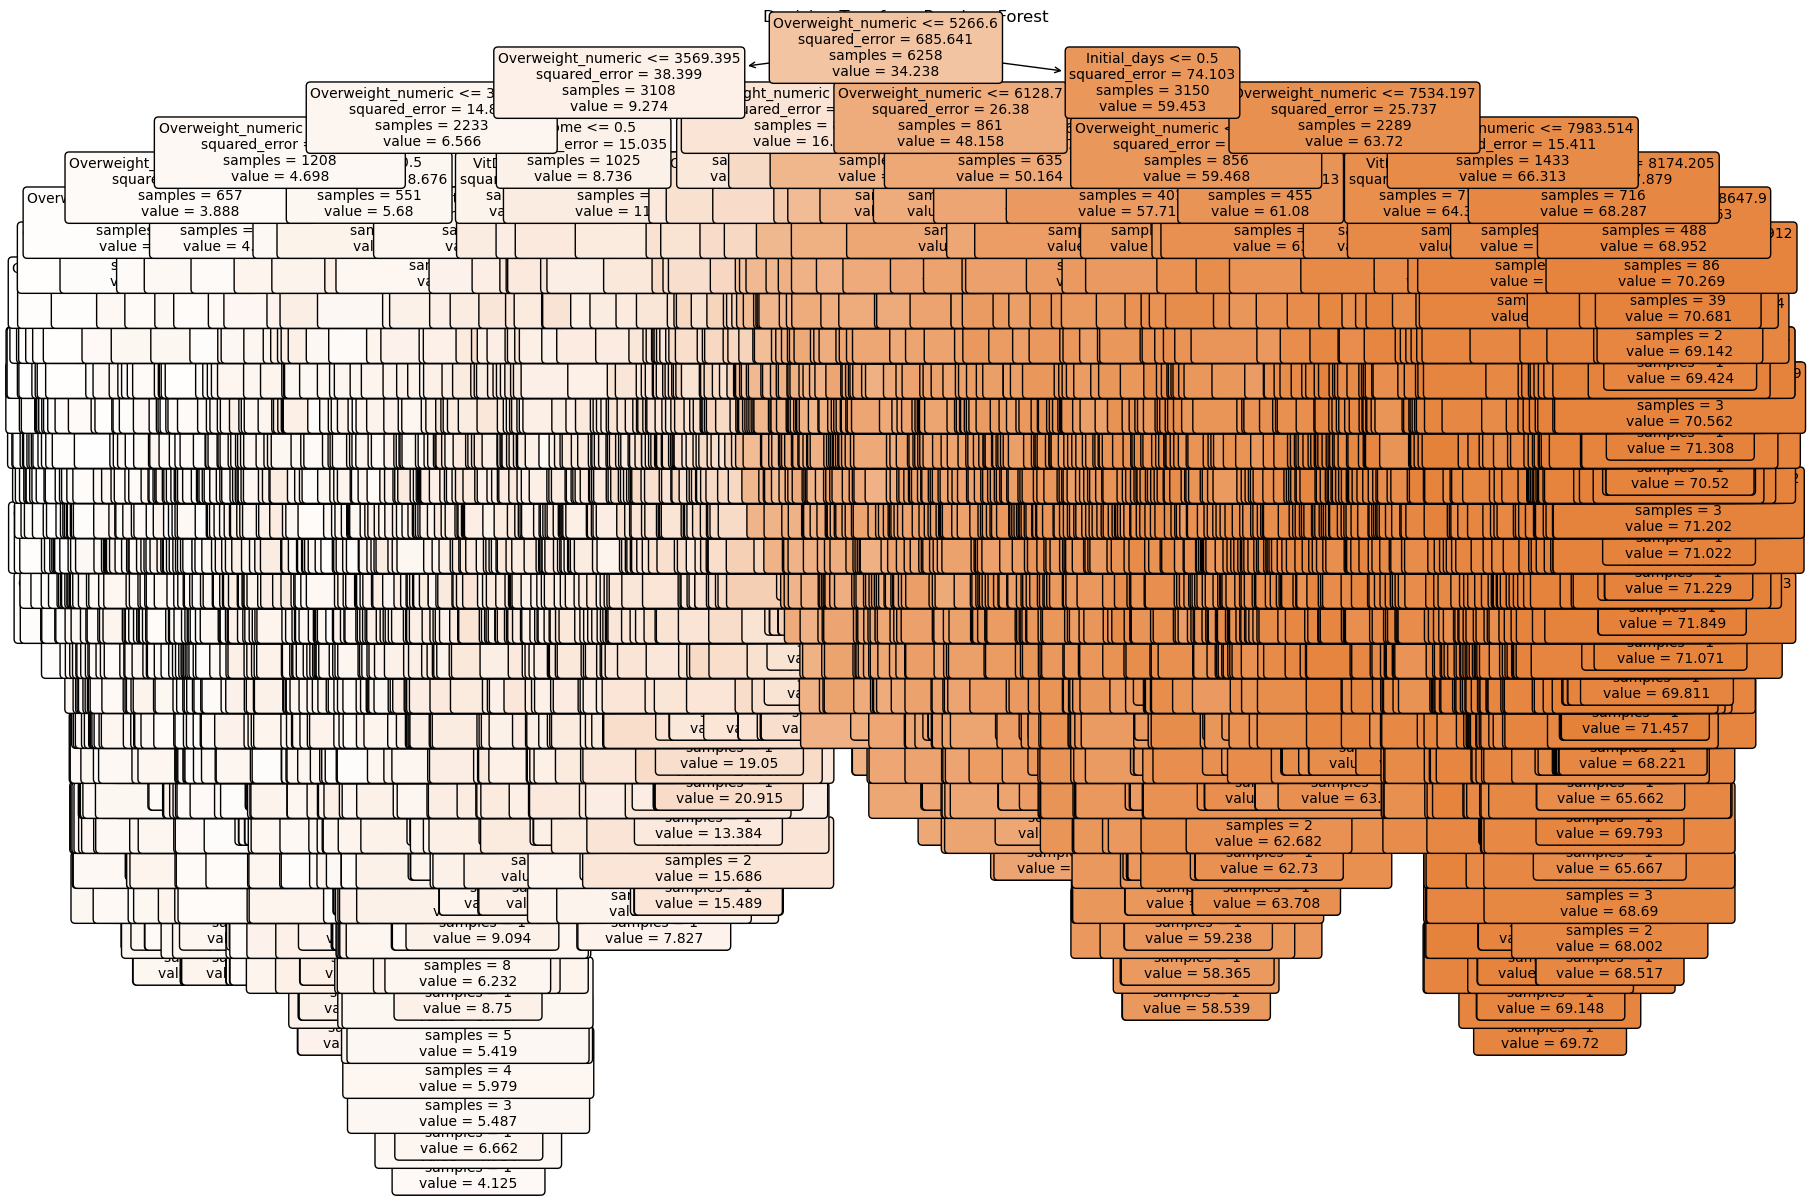

In [113]:
#plot a Decision Tree from Random Forest Regressor 
tree_to_plot=rfr.estimators_[0]
plt.figure(figsize=(20,15))
plot_tree(tree_to_plot, feature_names=df_209.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title('Decision Tree from Random Forest')
plt.show()